In [1]:
import os
import shutil
import utilities as rocku
from pprint import pprint
import numpy as np
from pystackreg import StackReg
from PIL import Image
import dxchange
from tqdm import tqdm
import matplotlib.pyplot as plt
import timeit

In [2]:
# need to change
instrument = "/HFIR/CG1D"
# instrument = "/SNS/VENUS"
ipts="26282"

In [3]:
# scan_loc = instrument + "/IPTS-"+ipts+"/shared/analysis/merged_RIGID_BODY_first/normalized/"
scan_loc = instrument + "/IPTS-"+ipts+"/shared/processed_data/normalized/"
save_loc = instrument + "/IPTS-"+ipts+"/shared/analysis/"
sorted(os.listdir(scan_loc))

['2021_08_25_106_200_pure_binned_by_3_median',
 '2021_08_26_106_200_pure_1_binned_by_3_median',
 '2021_08_26_106_200_pure_2_binned_by_3_median',
 '2021_08_26_106_200_pure_3_27s',
 '2021_08_26_106_200_pure_3_9s_binned_by_3_median',
 '2021_08_26_106_200_pure_4_heat_27s',
 '2021_08_26_106_200_pure_4_heat_9s_binned_by_3_median',
 '2021_10_11_Holder_1',
 '2021_10_11_Holder_2_50Cyc',
 'Holder_2_NoCycles_binned_by_5_median',
 'Step_Holder_binned_by_5_median',
 'merged',
 'sorted']

In [4]:
scan_dir = os.path.join(scan_loc, 'merged')
fname_list = rocku.sort_by_idx(os.listdir(scan_dir))
fname_list

['0013_Cool_cylce_1_0009_0013.tiff',
 '0016_Cool_cylce_1_0009_0016.tiff',
 '0019_Cool_cylce_1_0009_0019.tiff',
 '0022_Cool_cylce_1_0009_0022.tiff',
 '0025_Cool_cylce_1_0009_0025.tiff',
 '0028_Cool_cylce_1_0009_0028.tiff',
 '0031_Cool_cylce_1_0009_0031.tiff',
 '0034_Cool_cylce_1_0009_0034.tiff',
 '0037_Cool_cylce_1_0009_0037.tiff',
 '0040_Cool_cylce_1_0009_0040.tiff',
 '0043_Cool_cylce_1_0009_0043.tiff',
 '0046_Cool_cylce_1_0009_0046.tiff',
 '0049_Cool_cylce_1_0009_0049.tiff',
 '0052_Cool_cylce_1_0009_0052.tiff',
 '0055_Cool_cylce_1_0009_0055.tiff',
 '0058_Cool_cylce_1_0009_0058.tiff',
 '0061_Cool_cylce_1_0009_0061.tiff',
 '0064_Cool_cylce_1_0009_0064.tiff',
 '0067_Cool_cylce_1_0009_0067.tiff',
 '0070_Cool_cylce_1_0009_0070.tiff',
 '0073_Cool_cylce_1_0009_0073.tiff',
 '0076_Cool_cylce_1_0009_0076.tiff',
 '0079_Cool_cylce_1_0009_0079.tiff',
 '0082_Cool_cylce_1_0009_0082.tiff',
 '0085_Cool_cylce_1_0009_0085.tiff',
 '0088_Cool_cylce_1_0009_0088.tiff',
 '0091_Cool_cylce_1_0009_0091.tiff',
 

In [5]:
to_rmv = [
'4366_dummy_0027_4366.tiff'
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)
fname_list

2256
2255


['0013_Cool_cylce_1_0009_0013.tiff',
 '0016_Cool_cylce_1_0009_0016.tiff',
 '0019_Cool_cylce_1_0009_0019.tiff',
 '0022_Cool_cylce_1_0009_0022.tiff',
 '0025_Cool_cylce_1_0009_0025.tiff',
 '0028_Cool_cylce_1_0009_0028.tiff',
 '0031_Cool_cylce_1_0009_0031.tiff',
 '0034_Cool_cylce_1_0009_0034.tiff',
 '0037_Cool_cylce_1_0009_0037.tiff',
 '0040_Cool_cylce_1_0009_0040.tiff',
 '0043_Cool_cylce_1_0009_0043.tiff',
 '0046_Cool_cylce_1_0009_0046.tiff',
 '0049_Cool_cylce_1_0009_0049.tiff',
 '0052_Cool_cylce_1_0009_0052.tiff',
 '0055_Cool_cylce_1_0009_0055.tiff',
 '0058_Cool_cylce_1_0009_0058.tiff',
 '0061_Cool_cylce_1_0009_0061.tiff',
 '0064_Cool_cylce_1_0009_0064.tiff',
 '0067_Cool_cylce_1_0009_0067.tiff',
 '0070_Cool_cylce_1_0009_0070.tiff',
 '0073_Cool_cylce_1_0009_0073.tiff',
 '0076_Cool_cylce_1_0009_0076.tiff',
 '0079_Cool_cylce_1_0009_0079.tiff',
 '0082_Cool_cylce_1_0009_0082.tiff',
 '0085_Cool_cylce_1_0009_0085.tiff',
 '0088_Cool_cylce_1_0009_0088.tiff',
 '0091_Cool_cylce_1_0009_0091.tiff',
 

In [6]:
prev_fname = ""
group_count = 0
name_list = []
group_name = ''
sorted_dict = {}

for fname in fname_list:
    fpath = os.path.join(scan_dir, fname)
    if os.path.isfile(fpath):
        _str_list = fname.split('_')
        _base_name = '_'.join(_str_list[1:4])
        if _base_name != prev_fname:
            if _base_name[:4] != prev_fname[:4]:
                if len(name_list) != 0:
                    sorted_dict[group_name] = name_list
                    print(len(name_list))
                name_list = []
                name_list.append(fname)
                group_count += 1
                group_count_str = str(group_count)
                group_name = f"Group_{group_count_str.zfill(2)}_{_base_name[:4]}"
                print(f"\nGroup {group_count_str.zfill(2)}: {_base_name}")
                prev_fname = _base_name
        else:
            name_list.append(fname)
            if fname == fname_list[-1]:
                # group_count += 1
                sorted_dict[group_name] = name_list
                print(len(name_list))
pprint(sorted_dict)


Group 01: Cool_cylce_1
93

Group 02: Heating_cylce_1
49

Group 03: Cool_cylce_1
154

Group 04: Heating_Cylce_0009
48

Group 05: Coolin_Cylce_0009
1

Group 06: Heating_Cycle_OvNi
48

Group 07: Cooling_Cycle_OvNi
125

Group 08: Heating_Cycle_OvNi
48

Group 09: Cooling_Cycle_OvNi
12

Group 10: Heating_Cycle_2
48

Group 11: Cooling_Cycle_2
88

Group 12: Heating_Cycle_2
73

Group 13: Cooling_Cycle_2
166

Group 14: Heating_Cycle_2
55

Group 15: Cooling_Cycle_2
135

Group 16: Heating_Cycle_2
55

Group 17: Cooling_Cycle_2
172

Group 18: Heating_Cycle_2
58

Group 19: Cooling_Cycle_2
235

Group 20: Heating_Cycle_2
58

Group 21: Cooling_Cycle_2
108

Group 22: Heating_cylce_1
78
{'Group_01_Cool': ['0013_Cool_cylce_1_0009_0013.tiff',
                   '0016_Cool_cylce_1_0009_0016.tiff',
                   '0019_Cool_cylce_1_0009_0019.tiff',
                   '0022_Cool_cylce_1_0009_0022.tiff',
                   '0025_Cool_cylce_1_0009_0025.tiff',
                   '0028_Cool_cylce_1_0009_0028.

In [7]:
def sort_into_folders(sorted_dict, destination_folder):
    """
    Merges the contents of the source folder into the destination folder.
    If a file exists in both folders, the file from the source folder will overwrite the file in the destination folder.
    """
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    for each_key in sorted_dict.keys():
        _fname_list = sorted_dict[each_key]
        for item in _fname_list:
            source_item_path = os.path.join(scan_dir, item)
            destination_subdir = os.path.join(destination_folder, each_key)
            if not os.path.exists(destination_subdir):
                os.makedirs(destination_subdir)
            destination_item_path = os.path.join(destination_subdir, item)
            if os.path.isfile(source_item_path):
                shutil.copy2(source_item_path, destination_item_path) #copy2 preserves metadata
        print("Saving '{}' to '{}'".format(each_key, destination_folder))
        print(each_key, 'ends with', source_item_path, '\n')

In [8]:
destination_folder = os.path.join(scan_loc, 'sorted')
sort_into_folders(sorted_dict=sorted_dict, destination_folder=destination_folder)

Saving 'Group_01_Cool' to '/HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/sorted'
Group_01_Cool ends with /HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/merged/0289_Cool_cylce_1_0009_0289.tiff 

Saving 'Group_02_Heat' to '/HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/sorted'
Group_02_Heat ends with /HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/merged/0436_Heating_cylce_1_0009_0436.tiff 

Saving 'Group_03_Cool' to '/HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/sorted'
Group_03_Cool ends with /HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/merged/0898_Cool_cylce_1_0009_0898.tiff 

Saving 'Group_04_Heat' to '/HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/sorted'
Group_04_Heat ends with /HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/merged/1108_Heating_Cylce_0009_1108.tiff 

Saving 'Group_05_Cool' to '/HFIR/CG1D/IPTS-26282/shared/processed_data/normalized/sorted'
Group_05_Cool ends with /HFIR/CG1D/IPTS-26282/shared/processed

In [104]:
selected_dict = {}
for each_key in sorted_dict.keys():
    if 'Heat' in each_key:
        selected_dict[each_key] = sorted_dict[each_key][:5]
pprint(selected_dict)

{'Group_02_Heat': ['0292_Heating_cylce_1_0009_0292.tiff',
                   '0295_Heating_cylce_1_0009_0295.tiff',
                   '0298_Heating_cylce_1_0009_0298.tiff',
                   '0301_Heating_cylce_1_0009_0301.tiff',
                   '0304_Heating_cylce_1_0009_0304.tiff'],
 'Group_04_Heat': ['0967_Heating_Cylce_0009_0967.tiff',
                   '0970_Heating_Cylce_0009_0970.tiff',
                   '0973_Heating_Cylce_0009_0973.tiff',
                   '0976_Heating_Cylce_0009_0976.tiff',
                   '0979_Heating_Cylce_0009_0979.tiff'],
 'Group_06_Heat': ['1690_Heating_Cycle_OvNi_0009_1690.tiff',
                   '1693_Heating_Cycle_OvNi_0009_1693.tiff',
                   '1696_Heating_Cycle_OvNi_0009_1696.tiff',
                   '1699_Heating_Cycle_OvNi_0009_1699.tiff',
                   '1702_Heating_Cycle_OvNi_0009_1702.tiff'],
 'Group_08_Heat': ['2209_Heating_Cycle_OvNi_0009_2209.tiff',
                   '2212_Heating_Cycle_OvNi_0009_2212.tiff',


In [106]:
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}
img_stack_dict = {}
all_groups = list(selected_dict.keys())
for i, each_key in enumerate(all_groups):
    print("Loading '{}'".format(each_key))
    _img_stack = rocku.read_img_stack(os.path.join(destination_folder, each_key), selected_dict[each_key], flipud=False)
    if len(_img_stack)>1:
        reference = 'first'
        trans_algo = 'RIGID_BODY'
        moving_avg = 1
        n_frames = 1
        sr = StackReg(trans_algo_dict[trans_algo])
        _reg_stack = sr.register_transform_stack(_img_stack, reference=reference, n_frames=n_frames, moving_average=moving_avg, verbose=True)#, progress_callback=rocku.show_progress)
        _img = np.median(_reg_stack, axis=0)
    else:
        _img = _img_stack[0]
    img_stack_dict[each_key] = _img

Loading 'Group_02_Heat'


5it [00:00,  8.17it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


Loading 'Group_04_Heat'


5it [00:00,  8.88it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.28it/s]


Loading 'Group_06_Heat'


5it [00:00,  7.30it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


Loading 'Group_08_Heat'


5it [00:00,  9.32it/s]
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.06s/it]


Loading 'Group_10_Heat'


5it [00:01,  4.78it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.34it/s]


Loading 'Group_12_Heat'


5it [00:00,  9.33it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


Loading 'Group_14_Heat'


5it [00:00,  7.50it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.17it/s]


Loading 'Group_16_Heat'


5it [00:00,  9.40it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


Loading 'Group_18_Heat'


5it [00:00,  8.71it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]


Loading 'Group_20_Heat'


5it [00:00,  8.88it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]


Loading 'Group_22_Heat'


5it [00:00,  7.90it/s]
100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.10it/s]


In [125]:
img_stack = np.array(list(img_stack_dict.values()))
print(img_stack.shape)
selected_groups = all_groups[2:]
img_stack = img_stack[2:]
print(img_stack.shape)
print(selected_groups)

(11, 1070, 1350)
(9, 1070, 1350)
['Group_06_Heat', 'Group_08_Heat', 'Group_10_Heat', 'Group_12_Heat', 'Group_14_Heat', 'Group_16_Heat', 'Group_18_Heat', 'Group_20_Heat', 'Group_22_Heat']


/tmp/ipykernel_40248/2731562934.py:8: RuntimeWarning: divide by zero encountered in divide
  ax[2].imshow(np.divide(img_stack[-1], img_stack[0]), vmin=0.8, vmax=1.2)
/tmp/ipykernel_40248/2731562934.py:8: RuntimeWarning: invalid value encountered in divide
  ax[2].imshow(np.divide(img_stack[-1], img_stack[0]), vmin=0.8, vmax=1.2)


Text(0.5, 1.0, 'last/first')

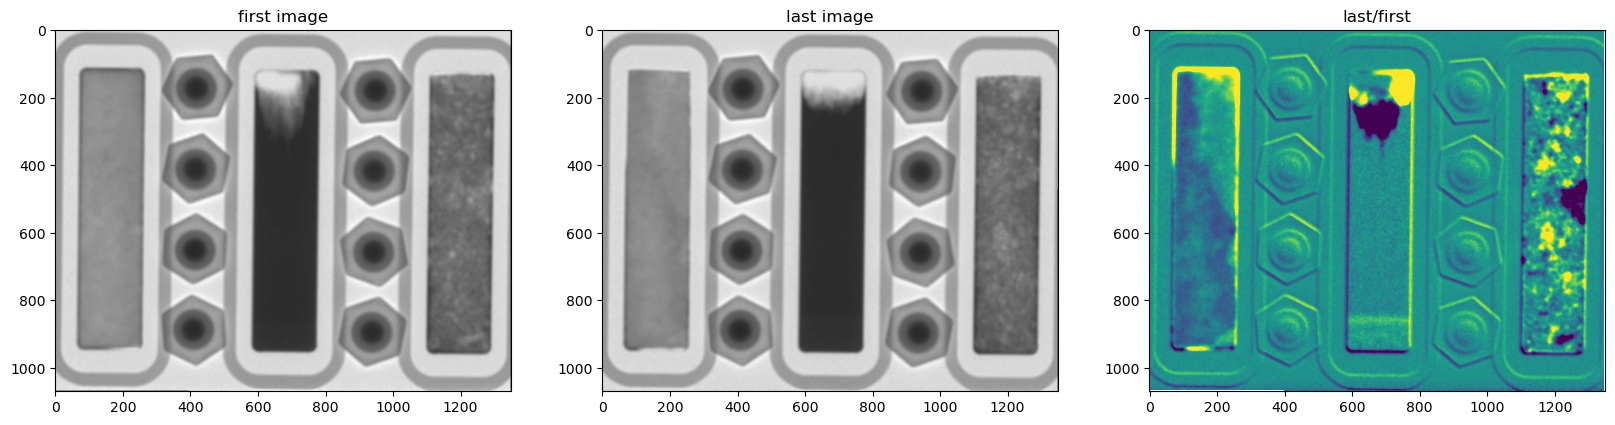

In [126]:
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_stack[0], cmap='gray')#vmin=0, vmax=1,
ax[0].set_title('first image')

ax[1].imshow(img_stack[-1], cmap='gray')
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack[-1], img_stack[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

Text(0.5, 1.0, 'overlay (reference=green, changed=red)')

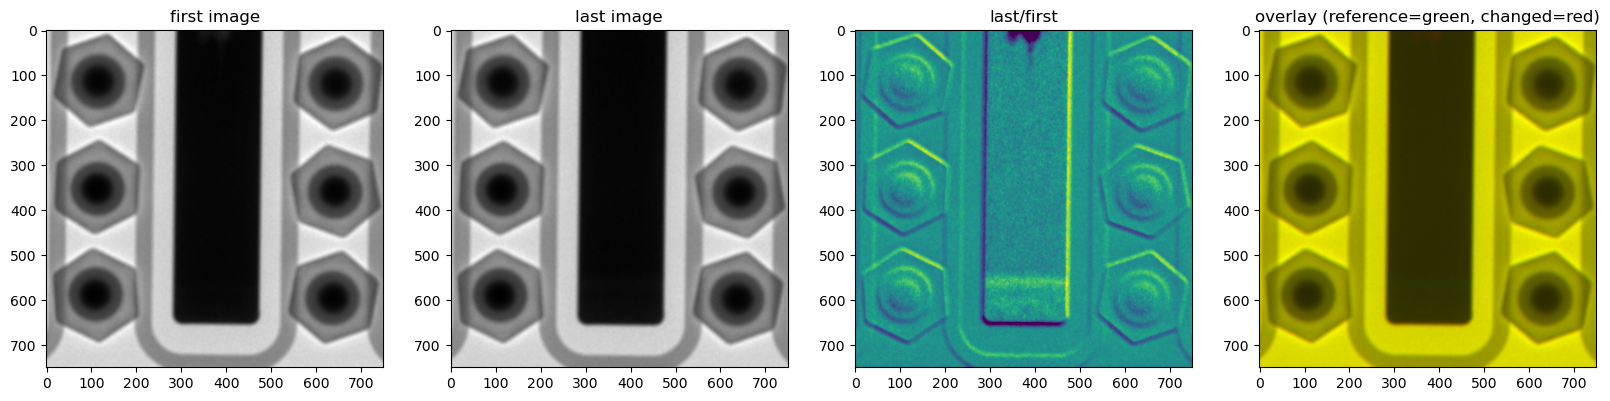

In [139]:
roi = True
# roi = False
roi_left = 300#300
roi_right = 1050#1650
roi_top = 300
roi_bottom = -20
# roi_left = 250
# roi_right = 1350
# roi_top = 900
# roi_bottom = 1350
#########################
#########################
img_stack_roi = rocku.crop(img_stack, roi_left, roi_right, roi_top, roi_bottom, roi)
f, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_stack_roi[0], cmap='gray')# vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(img_stack_roi[-1], cmap='gray')# vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack_roi[-1], img_stack_roi[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

ax[3].imshow(rocku.composite_images([img_stack_roi[0], img_stack_roi[-1]]))
ax[3].set_title('overlay (reference=green, changed=red)')
# ax[3].axis('off');

In [140]:
pixel_bin_size = 1
# pixel_bin_size = 2
func = np.sum
# dtype = np.float16
dtype = np.float32
# dtype = np.float64
#################################################
t0 = timeit.default_timer()
img_stack_resized = rocku.bin_pix(img_stack_roi, pixel_bin_size=pixel_bin_size, func=func, dtype=dtype)
t1 = timeit.default_timer()
print("Time: {} s".format(t1-t0))

Pixel_bin_size = 1, no binning
Time: 6.30207359790802e-05 s


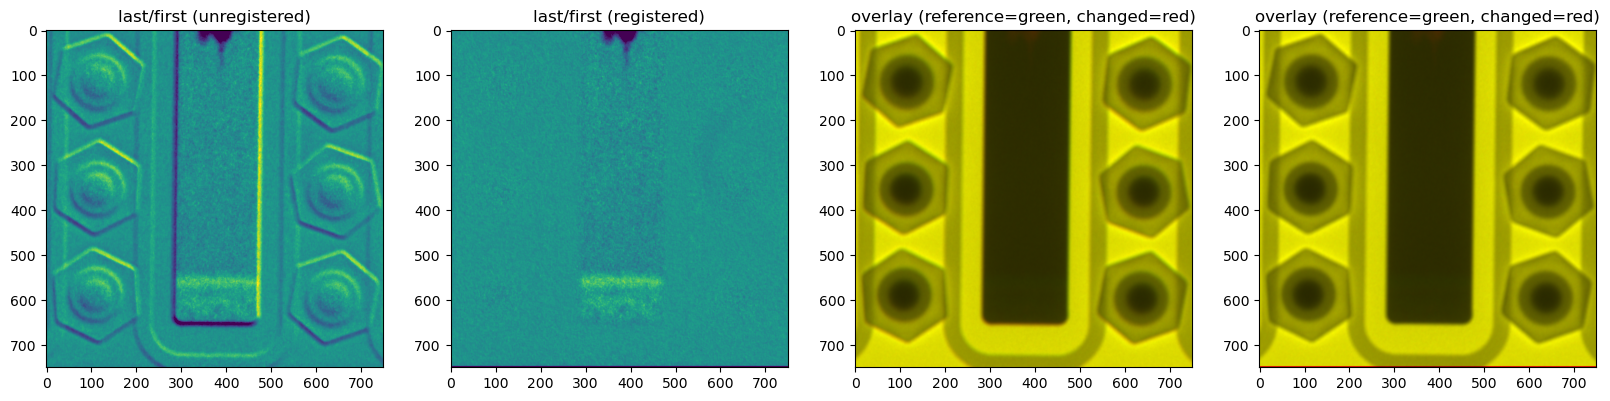

In [141]:
# perform_reg = False
perform_reg = True
trans_algo = 'RIGID_BODY'
# trans_algo = 'TRANSLATION'
# trans_algo = "SCALED_ROTATION"
#########################
#load reference and "moved" image
if perform_reg:
    ref = img_stack_resized[0]
    mov = img_stack_resized[-1]
    sr = StackReg(trans_algo_dict[trans_algo])
    reg = sr.register_transform(ref, mov)
    reg = reg.clip(min=0)
    after_reg = rocku.composite_images([ref, reg])
    before_reg = rocku.composite_images([ref, mov])
    
    f, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(np.divide(mov, ref), vmin=0.8, vmax=1.2)
    ax[0].set_title('last/first (unregistered)')
    
    ax[1].imshow(np.divide(reg, ref), vmin=0.8, vmax=1.2)
    ax[1].set_title('last/first (registered)')
    
    ax[2].imshow(before_reg)
    ax[2].set_title('overlay (reference=green, changed=red)')
    
    ax[3].imshow(after_reg)
    ax[3].set_title('overlay (reference=green, changed=red)')

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.02it/s]


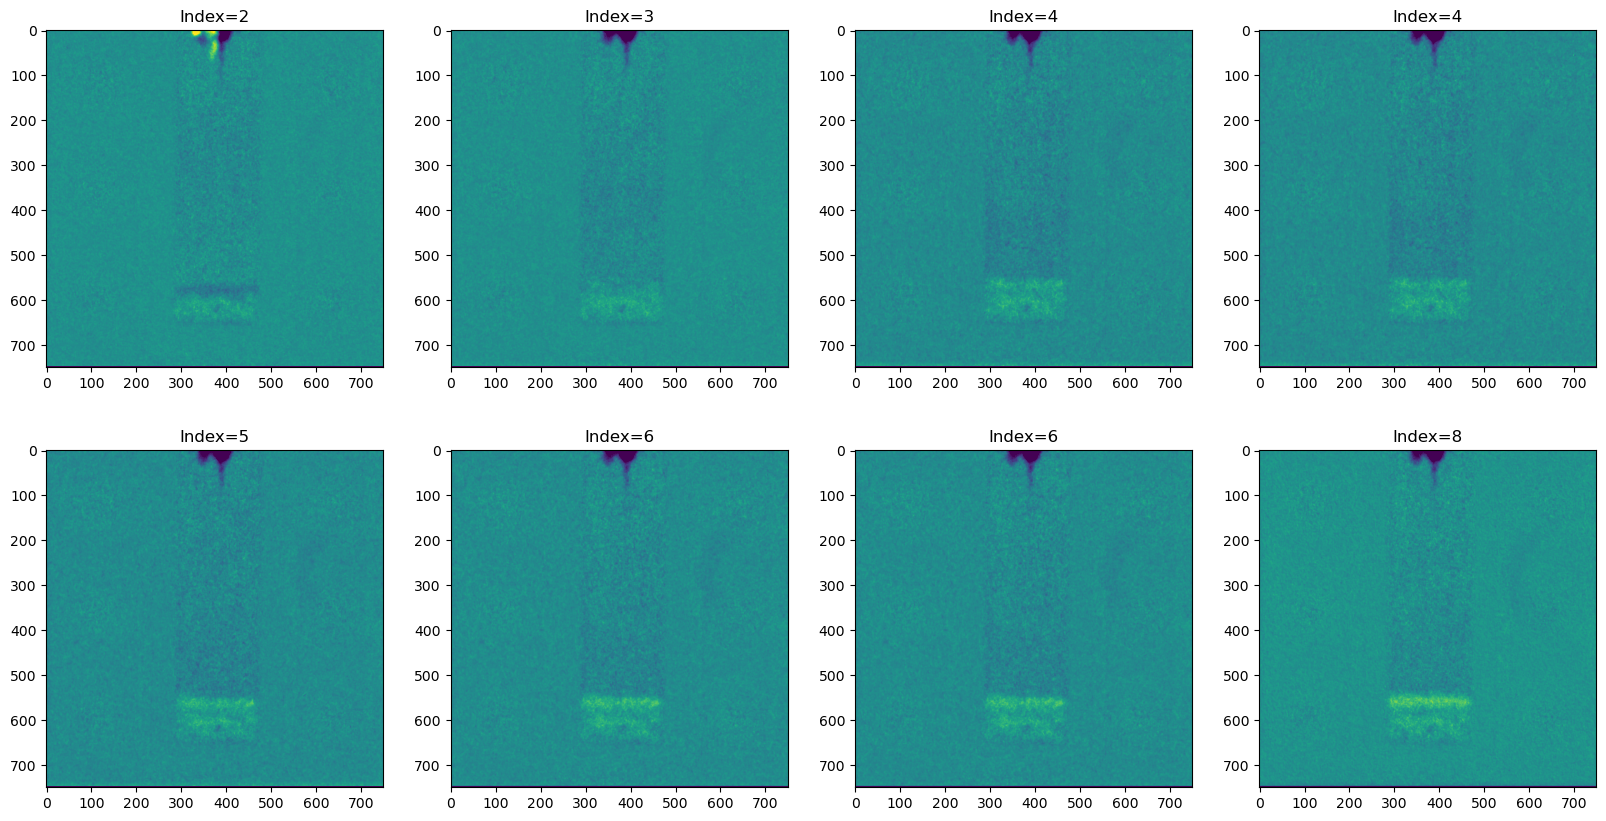

In [142]:
# reference = 'previous'
reference = 'first'
# reference = 'mean'
moving_avg = 1
n_frames = 1
init_avg_size = 1
random_idx = None
#################################################
if perform_reg:
    sr = StackReg(trans_algo_dict[trans_algo])
    reg_stack_roi = sr.register_transform_stack(img_stack_resized, reference=reference, n_frames=n_frames, moving_average=moving_avg, verbose=True)#, progress_callback=rocku.show_progress)
else:
    reg_stack_roi = img_stack_resized[:]
if init_avg_size > 1:
    reg_ratio = np.divide(reg_stack_roi, np.mean(reg_stack_roi[0:init_avg_size-1,:,:], axis=0))
else:
    reg_ratio = np.divide(reg_stack_roi, reg_stack_roi[0])
if random_idx is None:
    num_of_row = 2
    fig_per_row = 4
    random_idx = rocku.generate_randint_list(num_of_ele=fig_per_row*num_of_row, range_min=0, range_max=len(reg_ratio)-1)
fig_size = (20,10)
vmin=0.8
vmax=1.2
rocku.plot_imgs_from_stack(reg_ratio, random_idx, vmin=vmin, vmax=vmax, fig_per_row=fig_per_row, figsize=fig_size)

Cropped:


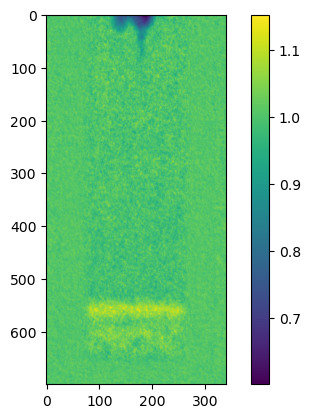

In [143]:
###################### need to change start
crop = True
# crop = False
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 210
crop_right = -200
crop_top = 0#530
crop_bottom = -50
###################### need to change end
reg_ratio_out = reg_ratio[:]
reg_ratio_crop_out = rocku.crop(reg_ratio_out, crop_left, crop_right, crop_top, crop_bottom, crop)
if crop:
    print("Cropped:")
    plt.imshow(reg_ratio_crop_out[-1])
    plt.colorbar()
    plt.show()

In [144]:
name_str = 'Heat_t0'
# name_str = None
############################################################
dir_name_list = [name_str, trans_algo, reference]
if name_str is None:
    dir_name_list.remove(name_str)
if not perform_reg:
    dir_name_list.remove(trans_algo)
    dir_name_list.remove(reference)

save_to = save_loc + "_".join(dir_name_list)
save_to_norm = save_to + '/normalized'
if perform_reg:
    save_to_ratio = save_to + '/ratio'
else:
    save_to_ratio = save_to + '_ratio'

if crop:
    reg_stack_subdir = save_to_norm + "/full"
    reg_ratio_subdir = save_to_ratio + "/full"
    reg_stack_crop_subdir = save_to_norm + "/crop"
    reg_ratio_crop_subdir = save_to_ratio + "/crop"
    print("Saving to '{}' ...".format(reg_stack_crop_subdir))
    print("Saving to '{}' ...".format(reg_ratio_crop_subdir))
else:
    reg_stack_subdir = save_to_norm
    reg_ratio_subdir = save_to_ratio
print("Saving to '{}' ...".format(reg_stack_subdir))
print("Saving to '{}' ...".format(reg_ratio_subdir))

reg_stack_out = reg_stack_roi[:]
reg_stack_crop_out = rocku.crop(reg_stack_roi, crop_left, crop_right, crop_top, crop_bottom, crop)
###############################
###############################
if perform_reg:
    if not os.path.exists(save_to):
        os.mkdir(save_to)
    if not os.path.exists(save_to_norm):
        os.mkdir(save_to_norm)
    if not os.path.exists(reg_stack_subdir):
        os.mkdir(reg_stack_subdir)
    
if not os.path.exists(save_to_ratio):
    os.mkdir(save_to_ratio)
if not os.path.exists(reg_ratio_subdir):
    os.mkdir(reg_ratio_subdir)
for i, e_name in tqdm(enumerate(selected_groups)):
    if perform_reg:
        img_pl = Image.fromarray(reg_stack_out[i])
        img_pl.save(reg_stack_subdir + "/" + e_name + '.tiff')
    img_pl_ratio = Image.fromarray(reg_ratio_out[i])
    img_pl_ratio.save(reg_ratio_subdir + "/" + e_name + '.tiff')
    if crop:
        if perform_reg:
            if not os.path.exists(reg_stack_crop_subdir):
                os.mkdir(reg_stack_crop_subdir)
            img_pl_crop = Image.fromarray(reg_stack_crop_out[i])
            img_pl_crop.save(reg_stack_crop_subdir + "/" + e_name + '.tiff')
        if not os.path.exists(reg_ratio_crop_subdir):
            os.mkdir(reg_ratio_crop_subdir)
        img_pl_ratio_crop = Image.fromarray(reg_ratio_crop_out[i])
        img_pl_ratio_crop.save(reg_ratio_crop_subdir + "/" + e_name + '.tiff')
    

Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Heat_t0_RIGID_BODY_first/normalized/crop' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Heat_t0_RIGID_BODY_first/ratio/crop' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Heat_t0_RIGID_BODY_first/normalized/full' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Heat_t0_RIGID_BODY_first/ratio/full' ...


9it [00:00, 27.95it/s]
